In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [26]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [176]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()
    vis.save(filename="rawE")
    

In [28]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()
    

In [175]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()
    vis.save(filename="resE")

In [30]:
def orient(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

In [31]:
# Algorytm do sprawdzania poprawności zwracania notacji trójkątów

In [32]:
def brute(n, tri, poly):
    connected = [[False for _ in range(n)] for _ in range(n)]
    for i in range(n):
        connected[i][(i + 1) % n] = True
        connected[i][(i - 1) % n] = True

    for u, v in tri:
        connected[u][v] = True
        connected[v][u] = True

    triangles = []
    for i in range(n):
        for j in range(i, n):
            for k in range(j, n):
                if connected[i][j] and connected[j][k] and connected[i][k]:
                    if orient(poly[i], poly[j], poly[k]) > 0:
                        triangles.append((i, j, k))
                    else:
                        triangles.append((k, j, i))
    return triangles

In [ ]:
# Funkcja do wypisywania trójkątów

In [56]:
def printResult(polygon, list):
    print("polygon: ")
    for el in enumerate(polygon):
        print(el)
    print("triangles: ")
    print(list)


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

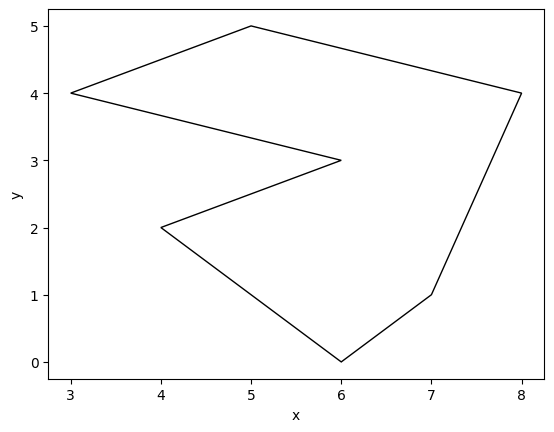

In [33]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

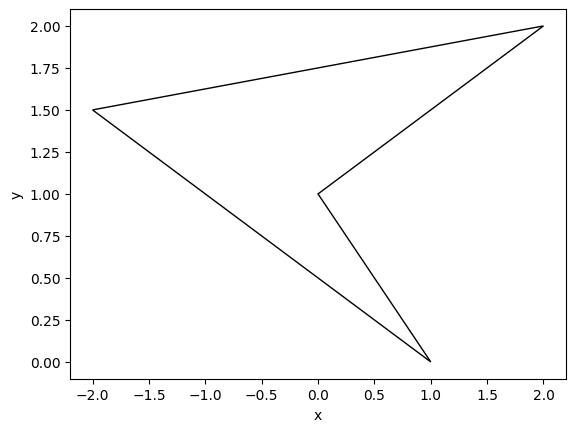

In [34]:
polygon = [(1,0),(0,1),(2,2),(-2,1.5)]
draw_polygon(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [35]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    min_y = 0
    max_y = 0

    n = len(polygon)
    for i in range(1,n):
        if polygon[i][1] < polygon[min_y][1]:
            min_y = i
        elif polygon[i][1] > polygon[max_y][1]:
            max_y = i

    # print("min", min_y, "max", max_y)
    ind = min_y
    while ind != max_y:
        if polygon[ind][1] > polygon[(ind + 1) % n][1]:
            # print("up", ind, (ind+1) % n)
            return False
        ind = (ind + 1) % n

    while ind != min_y:
        if polygon[ind][1] < polygon[(ind + 1) % n][1]:
            # print("down", ind, (ind+1) % n)
            return False
        ind = (ind + 1) % n

    return True


Przeprowadź test poprawności powyższej funkcji.

In [36]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [37]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

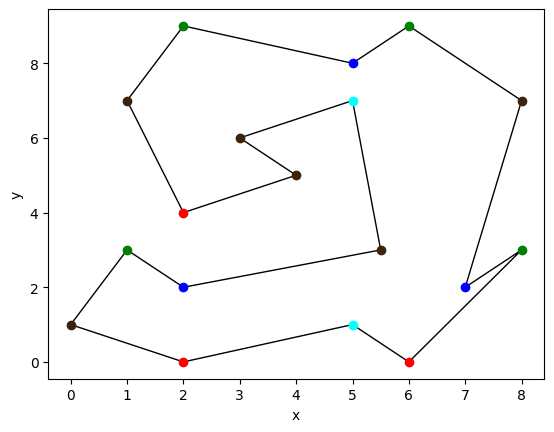

In [38]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [39]:
def orient(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

In [40]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    T = [-1 for _ in range(n)]
    for i in range(n):
        l_n, r_n = polygon[(i-1) % n], polygon[(i+1) % n]
        if l_n[1] > polygon[i][1] and r_n[1] > polygon[i][1]:
            if orient(l_n, polygon[i], r_n) > 0:
                T[i] = 1
            else:
                T[i] = 2
        elif l_n[1] < polygon[i][1] and r_n[1] < polygon[i][1]:
            if orient(l_n, polygon[i], r_n) > 0:
                T[i] = 0
            else:
                T[i] = 3
        else:
            T[i] = 4
    return T

Przeprowadź test poprawności powyższej funkcji. 

In [41]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

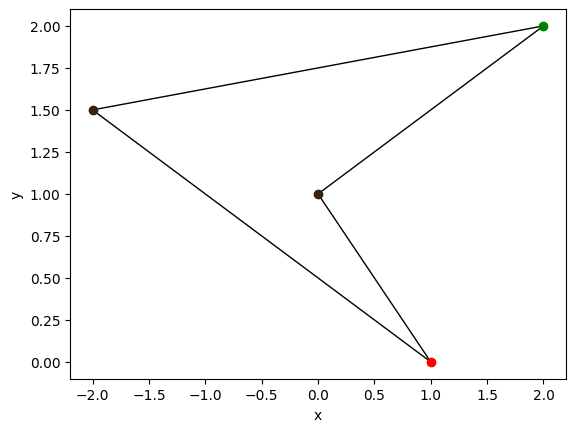

In [42]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

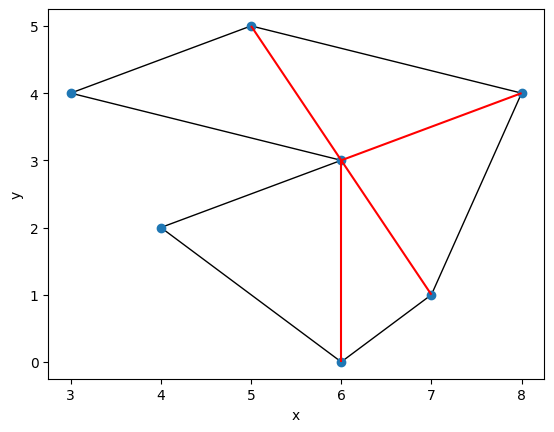

In [43]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [135]:
def divide_sides(polygon, top, bot):
    n = len(polygon)
    sides = [0 for _ in range(n)]
    ind = (top - 1) % n
    while ind != bot:
        sides[ind] = 1
        ind = (ind - 1) % n

    ind = (top + 1) % n
    while ind != bot:
        sides[ind] = -1
        ind = (ind + 1) % n

    return sides

In [136]:
def orient(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

In [137]:
def is_inside(a, b, mid, side):
    return side * orient(a, mid, b) > 0

In [144]:
def sort_merge(polygon):
    n = len(polygon)
    top_ind = max(enumerate(polygon), key=lambda x: x[1][1])[0]
    bot_ind = min(enumerate(polygon), key=lambda x: x[1][1])[0]
    enum = []

    for el in enumerate(polygon):
        
        enum.append(el)

    l, r = (bot_ind-1) % n, (bot_ind+1) % n
    result = [enum[bot_ind]]

    while l != top_ind or r != top_ind:
        if polygon[l][1] < polygon[r][1]:
            result.append(enum[l])
            l = (l-1) % n
        else:
            result.append(enum[r])
            r = (r+1) % n
    result.append(enum[top_ind])
    result.reverse()
    return bot_ind, top_ind, result

In [139]:
# Algorytm zwracający dodane krawędzie (do testowania)

In [147]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n = len(polygon)
    

    bot_ind, top_ind, poly_sorted = sort_merge(polygon)
    stack = []
    edges = []

    

    sides = divide_sides(polygon, top_ind, bot_ind)
    stack.append(poly_sorted[0][0])
    stack.append(poly_sorted[1][0])
    # print(sides)
    for i in range(2, n-1):
        if sides[poly_sorted[i][0]] != sides[stack[-1]]:

            while len(stack) != 0:
                v = stack.pop(-1)
                if len(stack) != 0:
                    edges.append((v, poly_sorted[i][0]))
            stack.append(poly_sorted[i-1][0])
            stack.append(poly_sorted[i][0])
        else:
            v = stack.pop(-1)
            while len(stack) != 0 and is_inside(poly_sorted[i][1], polygon[stack[-1]], poly_sorted[(i-1)%n][1], sides[i]):
                # print(stack, v)
                # print(poly_sorted[i][0], polygon[stack[-1]], poly_sorted[(i-1) % n][0], sides[i])

                v = stack.pop(-1)
                edges.append(( v, poly_sorted[i][0]))
            stack.append(v)
            stack.append(poly_sorted[i][0])
    for i in stack:
        if i != (bot_ind - 1) % n and i != (bot_ind + 1) % n:
            edges.append((bot_ind, i))
    return edges


In [148]:
# Algorytm zwracający krotki powstałych trójkątów w kolejności przeciwnej do wskazówek zegara

In [50]:
def orientPoly(poly, a, b, c):
    A = poly[a]
    B = poly[b]
    C = poly[c]
    return (A[0] - C[0]) * (B[1] - C[1]) - (A[1] - C[1]) * (B[0] - C[0])



def addGoodTriangle(poly, list, a, b, c):
    if orientPoly(poly, a, b, c) > 0:
        list.append((a, b, c))
    else:
        list.append((c, b, a))

In [150]:
def triangulation2(polygon):
    n = len(polygon)
    bot_ind, top_ind, poly_sorted = sort_merge(polygon)
    #print(poly_sorted)
    stack = []
    edges = []
    triangles = []

    

    sides = divide_sides(polygon, top_ind, bot_ind)
    stack.append(poly_sorted[0][0])
    stack.append(poly_sorted[1][0])
    last = False
    #print(sides)
    for i in range(2, n-1):
        if sides[poly_sorted[i][0]] != sides[stack[-1]]:

            while len(stack) != 0:
                v = stack.pop(-1)
                if len(stack) != 0:
                    edges.append((v, poly_sorted[i][0]))
                    last = (v, poly_sorted[i][0])
                    addGoodTriangle(polygon, triangles, v, poly_sorted[i][0], stack[-1])
            stack.append(poly_sorted[i-1][0])
            stack.append(poly_sorted[i][0])
        else:
            v = stack.pop(-1)
            # print(poly_sorted[i][0],v, stack[-1], is_inside(poly_sorted[i][1], polygon[stack[-1]], poly_sorted[(i-1)%n][1], sides[i]))
            while len(stack) != 0 and is_inside(poly_sorted[i][1], polygon[stack[-1]], poly_sorted[(i-1)%n][1], sides[i]):
                # print(stack, v)
                # print(poly_sorted[i][0], polygon[stack[-1]], poly_sorted[(i-1) % n][0], sides[i])
                prev_v = v
                v = stack.pop(-1)
                edges.append((poly_sorted[i][0], v))
                last = (poly_sorted[i][0], v)
                addGoodTriangle(polygon, triangles, poly_sorted[i][0], v, prev_v)
            stack.append(v)
            stack.append(poly_sorted[i][0])

    for i in range(len(stack)):
        if stack[i] != (bot_ind - 1) % n and stack[i] != (bot_ind + 1) % n:
            edges.append((bot_ind, stack[i]))
            addGoodTriangle(polygon, triangles, bot_ind, stack[i], stack[i-1])
            last = (stack[i], stack[i+1])
    if last:
        addGoodTriangle(polygon, triangles, bot_ind, last[0], last[1])
    return edges, triangles

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [149]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: WRONG ANSWER
		Output:   [(17, 1), (1, 16), (16, 2), (2, 15), (15, 3), (3, 14), (14, 4), (4, 13), (13, 5), (5, 12), (12, 6), (6, 11), (11, 7), (8, 10), (7, 10)]
		Expected: [[1, 17], [16, 1], [16, 2], [2, 15], [3, 15], [3, 14], [4, 14], [13, 4], [5, 13], [12, 5], [6, 12], [11, 6], [7, 11], [8, 11], [10, 8]]
	Test 4: WRONG ANSWER
		Output:   [(5, 3), (3, 6), (6, 2), (1, 7), (2, 7), (7, 0), (0, 8)]
		Expected: [[3, 5], [3, 6], [2, 6], [1, 6], [7, 1], [0, 7], [8, 0]]
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: WRONG ANSWER
		Output:   [(5, 3), (3, 1), (5, 1), (6, 1)]
		Expected: [[5, 3], [1, 3], [6, 1], [6, 3]]
	Test 9: Passed
	Test 10: Passed
Result: 7/10
Time: 0.016s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

polygon: 
(0, (1, 0))
(1, (0, 1))
(2, (2, 2))
(3, (-2, 1.5))
triangles: 
[(3, 1, 2), (1, 3, 0)]


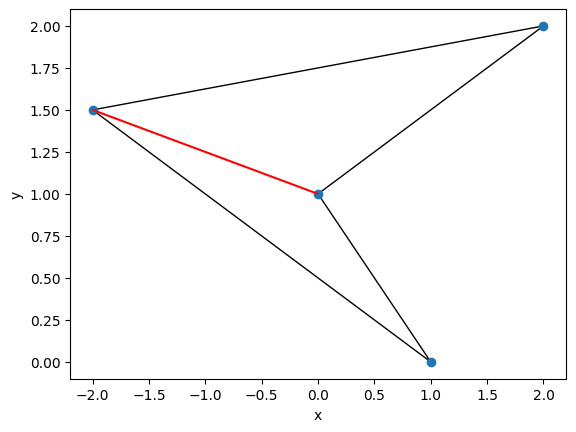

In [151]:
tri, list = triangulation2(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])
printResult(polygon, list)

In [152]:
# Testy które "nie przechodzą"

polygon: 
(0, (0.002417337356075161, 0.04811376394010061))
(1, (-0.006453630385860332, 0.03126327374402216))
(2, (-0.024417340063279683, 0.021152979626375107))
(3, (-0.006675404579408711, 0.009020626685198624))
(4, (-0.034175404579408715, -0.0024377066481347104))
(5, (-0.006231856192311938, -0.013559030177546477))
(6, (-0.045929436837473234, -0.029735500765781776))
(7, (-0.006453630385860332, -0.036138687040291585))
(8, (-0.004679436837473225, -0.04422692233440923))
(9, (-2.2178772957098802e-05, -0.0499560890010759))
(10, (0.0037479825173654807, -0.04523795174617394))
(11, (0.004856853485107421, -0.03479064782460531))
(12, (0.04322378896897838, -0.026365402726566088))
(13, (0.0050786276786558004, -0.012548000765781775))
(14, (0.02548185348510741, -0.0010896674324484407))
(15, (0.005522176065752574, 0.010368665900884907))
(16, (0.01616733735607516, 0.02317503844990451))
(17, (0.0050786276786558004, 0.034633371783237846))
triangles: 
[(0, 1, 17), (1, 16, 17), (1, 2, 16), (2, 15, 16), (2,

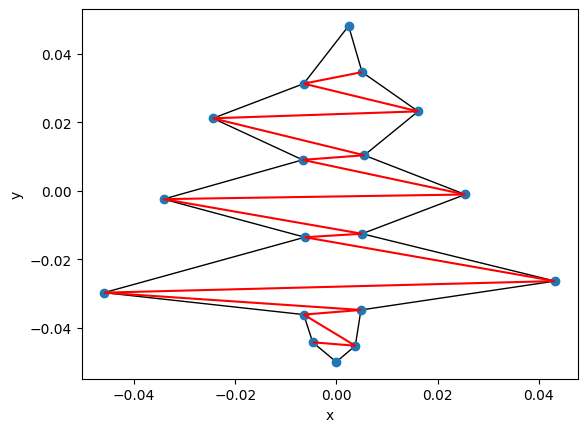

In [153]:
test3 = [(0.002417337356075161, 0.04811376394010061), (-0.006453630385860332, 0.03126327374402216), (-0.024417340063279683, 0.021152979626375107), (-0.006675404579408711, 0.009020626685198624), (-0.034175404579408715, -0.0024377066481347104), (-0.006231856192311938, -0.013559030177546477), (-0.045929436837473234, -0.029735500765781776), (-0.006453630385860332, -0.036138687040291585), (-0.004679436837473225, -0.04422692233440923), (-2.2178772957098802e-05, -0.0499560890010759), (0.0037479825173654807, -0.04523795174617394), (0.004856853485107421, -0.03479064782460531), (0.04322378896897838, -0.026365402726566088), (0.0050786276786558004, -0.012548000765781775), (0.02548185348510741, -0.0010896674324484407), (0.005522176065752574, 0.010368665900884907), (0.01616733735607516, 0.02317503844990451), (0.0050786276786558004, 0.034633371783237846)]

tri, list = triangulation2(test3)
draw_polygon_tri(test3, [(test3[x], test3[y]) for (x, y) in tri])
printResult(test3, list)

polygon: 
(0, (0.03523160349938177, -0.0065379891676061175))
(1, (0.0037396680155108025, 0.01637867749906055))
(2, (0.041884829305833385, 0.02446691279317821))
(3, (0.004848538983252729, 0.03794730495004095))
(4, (0.03767111962841403, 0.04435049122455076))
(5, (0.005735635757446289, 0.05210171671474684))
(6, (-0.04837726746836017, -0.0466421558342728))
triangles: 
[(4, 5, 3), (2, 3, 1), (1, 5, 3), (6, 1, 5), (0, 1, 6)]


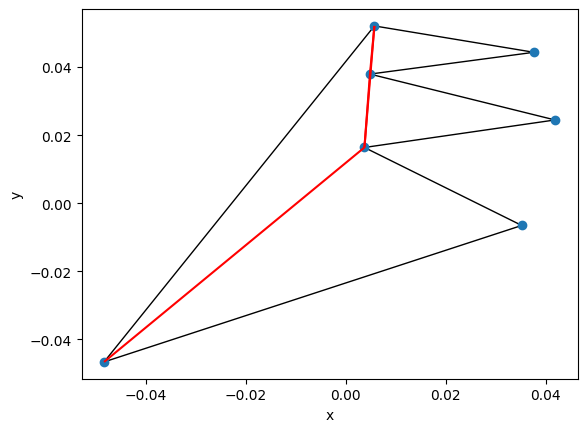

In [154]:
test8 = [(0.03523160349938177, -0.0065379891676061175),
        (0.0037396680155108025, 0.01637867749906055),
        (0.041884829305833385, 0.02446691279317821),
        (0.004848538983252729, 0.03794730495004095),
        (0.03767111962841403, 0.04435049122455076),
        (0.005735635757446289, 0.05210171671474684),
        (-0.04837726746836017, -0.0466421558342728)]
tri, list = triangulation2(test8)
draw_polygon_tri(test8, [(test8[x], test8[y]) for (x, y) in tri])
printResult(test8, list)


polygon: 
(0, (0.03877999059615596, -0.025073528383292402))
(1, (0.011501764789704341, -0.007212008775449252))
(2, (0.038336442209059185, 0.0062683833814135))
(3, (0.015493700273575314, 0.013008579459844863))
(4, (0.04121950672518822, 0.027500001028472332))
(5, (0.011501764789704341, 0.050416667695139))
(6, (-0.039506299726424686, 0.007279412793178203))
(7, (-0.022873235210295655, -0.009908087206821806))
(8, (-0.04527242875868275, -0.03080269504995907))
(9, (-0.00047404166190855024, -0.041924018579370836))
triangles: 
[(4, 5, 3), (5, 6, 3), (6, 2, 3), (2, 7, 1), (6, 7, 2), (7, 0, 1), (7, 8, 0), (9, 0, 8)]


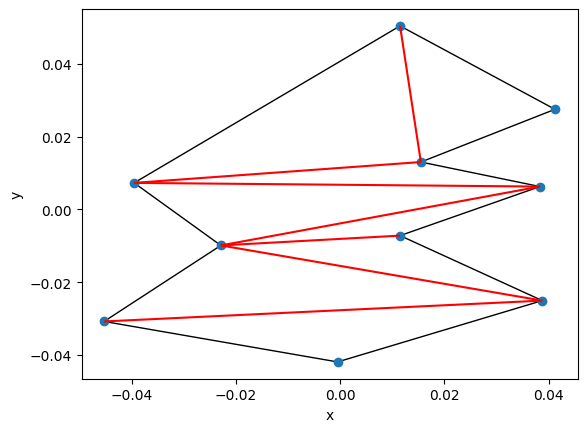

In [155]:
test4 = [
    (0.03877999059615596, -0.025073528383292402),
    (0.011501764789704341, -0.007212008775449252),
    (0.038336442209059185, 0.0062683833814135),
    (0.015493700273575314, 0.013008579459844863),
    (0.04121950672518822, 0.027500001028472332),
    (0.011501764789704341, 0.050416667695139),
    (-0.039506299726424686, 0.007279412793178203),
    (-0.022873235210295655, -0.009908087206821806),
    (-0.04527242875868275, -0.03080269504995907),
    (-0.00047404166190855024, -0.041924018579370836)


]
tri, list = triangulation2(test4)
draw_polygon_tri(test4, [(test4[x], test4[y]) for (x, y) in tri])
printResult(test4, list)


In [156]:
#Wielokąt A



polygon: 
(0, (4.596774193548388, 2.207792207792208))
(1, (7.629032258064516, 4.6103896103896105))
(2, (7.61290322580645, 7.48917748917749))
(3, (5.048387096774194, 9.393939393939393))
(4, (2.9032258064516125, 6.017316017316018))
triangles: 
[(3, 4, 2), (4, 1, 2), (1, 4, 0)]


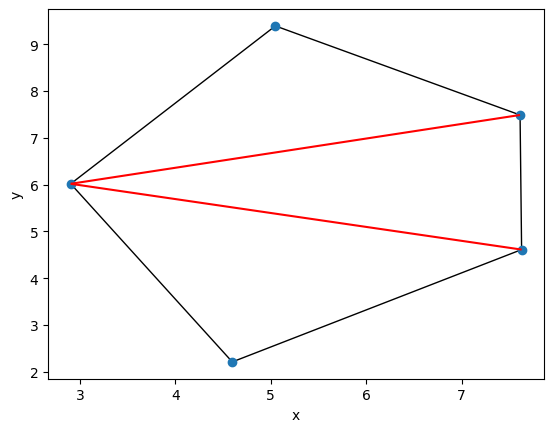

In [157]:
A = [(4.596774193548388, 2.207792207792208), (7.629032258064516, 4.6103896103896105), (7.61290322580645, 7.48917748917749), (5.048387096774194, 9.393939393939393), (2.9032258064516125, 6.017316017316018)]
#for point in enumerate(A):
#print(point)

tri, list = triangulation2(A)
draw_polygon_tri(A, [(A[x], A[y]) for (x, y) in tri])
printResult(A, list)

In [159]:
# Wielokąt B

polygon: 
(0, [6.580645161290322, 1.7532467532467535])
(1, [5.032258064516128, 2.770562770562771])
(2, [5.016129032258064, 3.8528138528138536])
(3, [6.661290322580644, 4.523809523809525])
(4, [5.048387096774194, 5.497835497835498])
(5, [5.032258064516128, 6.818181818181819])
(6, [6.758064516129032, 7.705627705627706])
(7, [3.9354838709677415, 9.025974025974024])
(8, [3.9999999999999996, 1.4502164502164503])
triangles: 
[(6, 7, 5), (5, 7, 4), (3, 4, 2), (4, 7, 2), (2, 7, 1), (8, 1, 7), (0, 1, 8)]


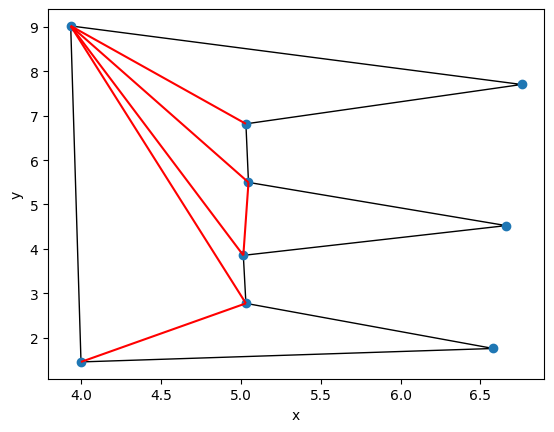

In [160]:
A = [[3.9999999999999996, 1.4502164502164503], [3.9354838709677415, 9.025974025974024], [6.758064516129032, 7.705627705627706], [5.032258064516128, 6.818181818181819], [5.048387096774194, 5.497835497835498], [6.661290322580644, 4.523809523809525], [5.016129032258064, 3.8528138528138536], [5.032258064516128, 2.770562770562771], [6.580645161290322, 1.7532467532467535]]
A.reverse()

tri, list = triangulation2(A)
colors = color_vertex(A)
#draw_polygon_colors(A, colors, "rawB")
draw_polygon_tri(A, [(A[x], A[y]) for (x, y) in tri])
printResult(A, list)

In [161]:
# Wielokąt C

polygon: 
(0, [3.8870967741935485, 2.121212121212121])
(1, [3.8387096774193545, 1.2554112554112555])
(2, [4.46774193548387, 0.8008658008658014])
(3, [5.14516129032258, 1.298701298701299])
(4, [5.274193548387096, 2.2727272727272734])
(5, [8.854838709677418, 3.203463203463204])
(6, [5.5, 4.437229437229438])
(7, [8.806451612903226, 5.714285714285714])
(8, [5.403225806451612, 6.8398268398268405])
(9, [7.306451612903226, 7.857142857142857])
(10, [5.209677419354838, 8.463203463203463])
(11, [4.306451612903226, 9.783549783549782])
(12, [3.5806451612903225, 8.54978354978355])
(13, [1.806451612903226, 7.575757575757575])
(14, [3.4193548387096775, 6.7099567099567095])
(15, [1.6451612903225805, 5.367965367965368])
(16, [3.4838709677419355, 4.653679653679654])
(17, [1.693548387096774, 3.1818181818181825])
triangles: 
[(12, 10, 11), (10, 12, 9), (12, 13, 9), (13, 8, 9), (13, 14, 8), (14, 7, 8), (14, 15, 7), (16, 6, 15), (15, 6, 7), (6, 17, 5), (16, 17, 6), (17, 4, 5), (17, 0, 4), (0, 3, 4), (0, 1, 

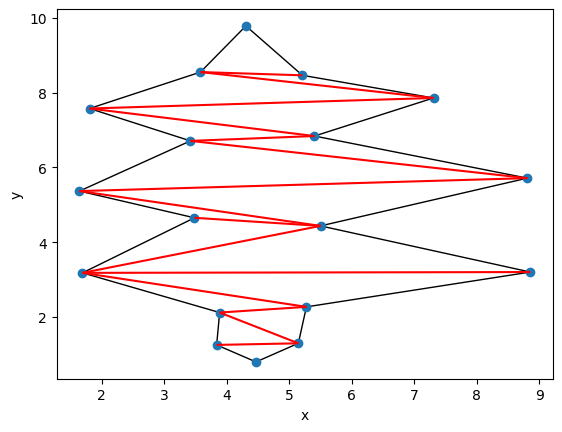

In [162]:
A = [[3.8870967741935485, 2.121212121212121], [3.8387096774193545, 1.2554112554112555], [4.46774193548387, 0.8008658008658014], [5.14516129032258, 1.298701298701299], [5.274193548387096, 2.2727272727272734], [8.854838709677418, 3.203463203463204], [5.5, 4.437229437229438], [8.806451612903226, 5.714285714285714], [5.403225806451612, 6.8398268398268405], [7.306451612903226, 7.857142857142857], [5.209677419354838, 8.463203463203463], [4.306451612903226, 9.783549783549782], [3.5806451612903225, 8.54978354978355], [1.806451612903226, 7.575757575757575], [3.4193548387096775, 6.7099567099567095], [1.6451612903225805, 5.367965367965368], [3.4838709677419355, 4.653679653679654], [1.693548387096774, 3.1818181818181825]]

tri, list = triangulation2(A)

draw_polygon_tri(A, [(A[x], A[y]) for (x, y) in tri])
printResult(A, list)

In [165]:
# Wielokąt D

polygon: 
(0, [2.3548387096774195, 9.155844155844155])
(1, [2.7258064516129035, 8.116883116883116])
(2, [2.9032258064516125, 7.142857142857143])
(3, [2.9354838709677415, 6.255411255411255])
(4, [2.6290322580645165, 5.0649350649350655])
(5, [2.064516129032258, 4.06926406926407])
(6, [1.1129032258064515, 3.311688311688312])
(7, [8.14516129032258, 1.7748917748917752])
triangles: 
[(0, 1, 7), (1, 2, 7), (2, 3, 7), (3, 4, 7), (4, 5, 7), (7, 5, 6)]


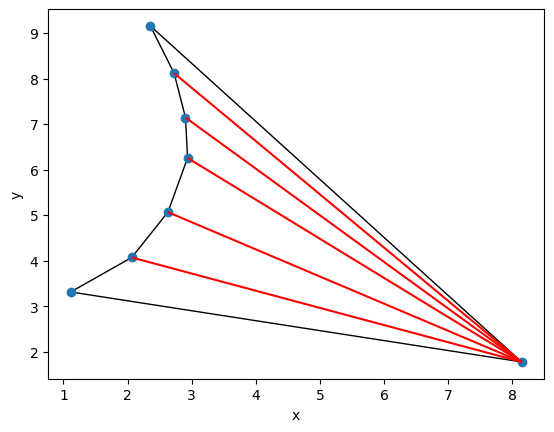

In [168]:
A = [[8.14516129032258, 1.7748917748917752], [1.1129032258064515, 3.311688311688312], [2.064516129032258, 4.06926406926407], [2.6290322580645165, 5.0649350649350655], [2.9354838709677415, 6.255411255411255], [2.9032258064516125, 7.142857142857143], [2.7258064516129035, 8.116883116883116], [2.3548387096774195, 9.155844155844155]]
A.reverse()

tri, list = triangulation2(A)

draw_polygon_tri(A, [(A[x], A[y]) for (x, y) in tri])
printResult(A, list)

In [ ]:
# Wielokąt E

polygon: 
(0, [2.338709677419355, 1.861471861471862])
(1, [5.919354838709678, 3.4848484848484853])
(2, [3.8064516129032255, 4.696969696969697])
(3, [6.564516129032258, 5.25974025974026])
(4, [5.209677419354838, 6.125541125541126])
(5, [7.14516129032258, 7.0562770562770565])
(6, [6.451612903225806, 7.48917748917749])
(7, [7.693548387096774, 8.83116883116883])
(8, [4.790322580645162, 9.913419913419913])
triangles: 
[(7, 8, 6), (5, 6, 4), (6, 8, 4), (3, 4, 2), (4, 8, 2), (0, 2, 8), (1, 2, 0)]


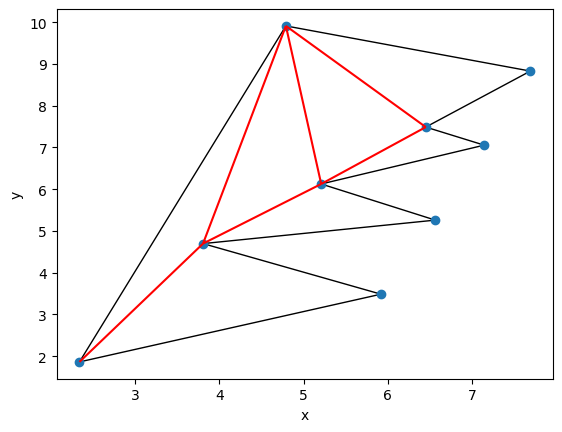

In [167]:
A = [[2.338709677419355, 1.861471861471862], [5.919354838709678, 3.4848484848484853], [3.8064516129032255, 4.696969696969697], [6.564516129032258, 5.25974025974026], [5.209677419354838, 6.125541125541126], [7.14516129032258, 7.0562770562770565], [6.451612903225806, 7.48917748917749], [7.693548387096774, 8.83116883116883], [4.790322580645162, 9.913419913419913]]

tri, list = triangulation2(A)
draw_polygon_tri(A, [(A[x], A[y]) for (x, y) in tri])
printResult(A, list)

In [ ]:
# gify



In [169]:
def triangulationGif(polygon):
    n = len(polygon)
    poly_sorted = sorted(enumerate(polygon), key=lambda x: -x[1][1])
    vis=Visualizer()
    vis.add_polygon(polygon, fill=False)
    stack = []
    stackDrawPoints = []
    edges = []
    

    

    top_ind = poly_sorted[0][0]
    bot_ind = poly_sorted[-1][0]

    sides = divide_sides(polygon, top_ind, bot_ind)
    stack.append(poly_sorted[0][0])
    p = vis.add_point(polygon[poly_sorted[0][0]], color='green')
    stackDrawPoints.append(p)
    stack.append(poly_sorted[1][0])
    p = vis.add_point(polygon[poly_sorted[1][0]], color='green')
    stackDrawPoints.append(p)
    # print(sides)
    for i in range(2, n-1):
        if sides[poly_sorted[i][0]] != sides[stack[-1]]:

            while len(stack) != 0:
                v = stack.pop(-1)
                t = stackDrawPoints.pop(-1)
                vis.remove_figure(t)
                if len(stack) != 0:
                    edges.append((v, poly_sorted[i][0]))
                    vis.add_line_segment((polygon[v], polygon[poly_sorted[i][0]]))
                    
            stack.append(poly_sorted[i-1][0])
            p = vis.add_point(polygon[poly_sorted[i-1][0]], color='green')
            stackDrawPoints.append(p)
            stack.append(poly_sorted[i][0])
            p = vis.add_point(polygon[poly_sorted[i][0]], color='green')
            stackDrawPoints.append(p)
        else:
            v = stack.pop(-1)
            t = stackDrawPoints.pop(-1)
            vis.remove_figure(t)
            while len(stack) != 0 and is_inside(poly_sorted[i][1], polygon[stack[-1]], poly_sorted[(i-1)%n][1], sides[i]):
                # print(stack, v)
                # print(poly_sorted[i][0], polygon[stack[-1]], poly_sorted[(i-1) % n][0], sides[i])

                v = stack.pop(-1)
                t = stackDrawPoints.pop(-1)
                vis.remove_figure(t)
                edges.append(( v, poly_sorted[i][0]))
                vis.add_line_segment((polygon[v], polygon[poly_sorted[i][0]]))
            stack.append(v)
            p = vis.add_point(polygon[v], color='green')
            stackDrawPoints.append(p)
            stack.append(poly_sorted[i][0])
            p = vis.add_point(polygon[poly_sorted[i][0]], color='green')
            stackDrawPoints.append(p)
    for i in stack:
        if i != (bot_ind - 1) % n and i != (bot_ind + 1) % n:
            edges.append((bot_ind, i))
            vis.add_line_segment((polygon[bot_ind], polygon[i]))
    return edges, vis


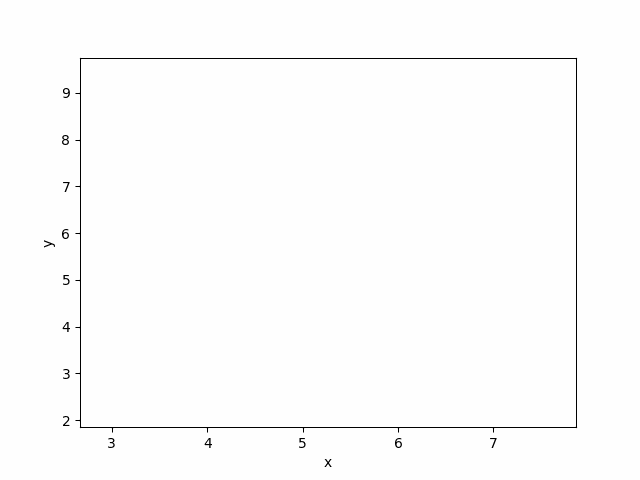

In [191]:
A = [(4.596774193548388, 2.207792207792208), (7.629032258064516, 4.6103896103896105), (7.61290322580645, 7.48917748917749), (5.048387096774194, 9.393939393939393), (2.9032258064516125, 6.017316017316018)]



_, vis = triangulationGif(A)
vis.show_gif()


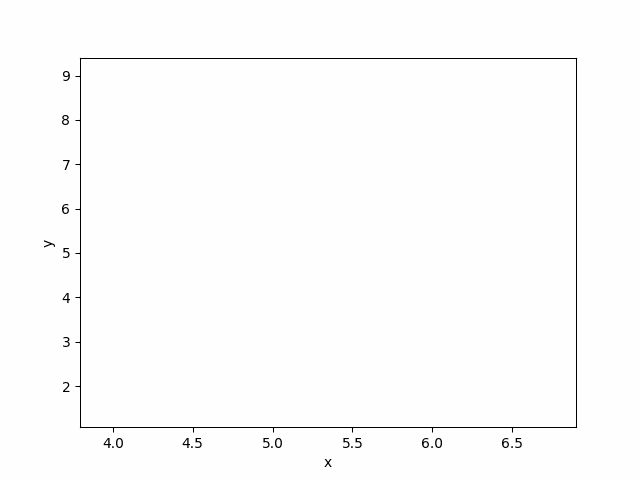

In [190]:
A = [[3.9999999999999996, 1.4502164502164503], [3.9354838709677415, 9.025974025974024], [6.758064516129032, 7.705627705627706], [5.032258064516128, 6.818181818181819], [5.048387096774194, 5.497835497835498], [6.661290322580644, 4.523809523809525], [5.016129032258064, 3.8528138528138536], [5.032258064516128, 2.770562770562771], [6.580645161290322, 1.7532467532467535]]
A.reverse()

_, vis = triangulationGif(A)
vis.show_gif()


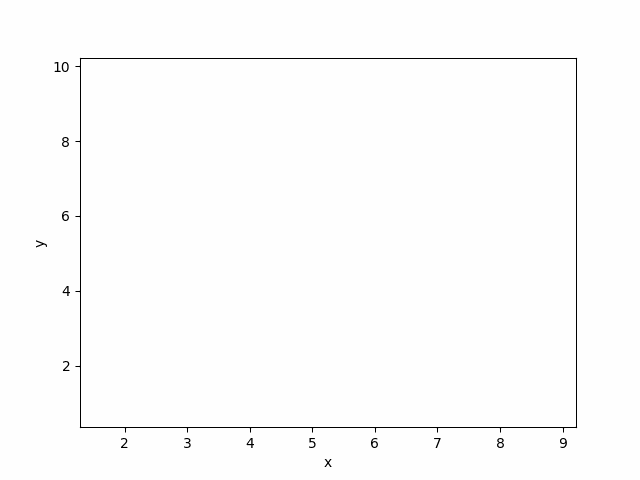

In [189]:
A = [[3.8870967741935485, 2.121212121212121], [3.8387096774193545, 1.2554112554112555], [4.46774193548387, 0.8008658008658014], [5.14516129032258, 1.298701298701299], [5.274193548387096, 2.2727272727272734], [8.854838709677418, 3.203463203463204], [5.5, 4.437229437229438], [8.806451612903226, 5.714285714285714], [5.403225806451612, 6.8398268398268405], [7.306451612903226, 7.857142857142857], [5.209677419354838, 8.463203463203463], [4.306451612903226, 9.783549783549782], [3.5806451612903225, 8.54978354978355], [1.806451612903226, 7.575757575757575], [3.4193548387096775, 6.7099567099567095], [1.6451612903225805, 5.367965367965368], [3.4838709677419355, 4.653679653679654], [1.693548387096774, 3.1818181818181825]]


_, vis = triangulationGif(A)
vis.show_gif()


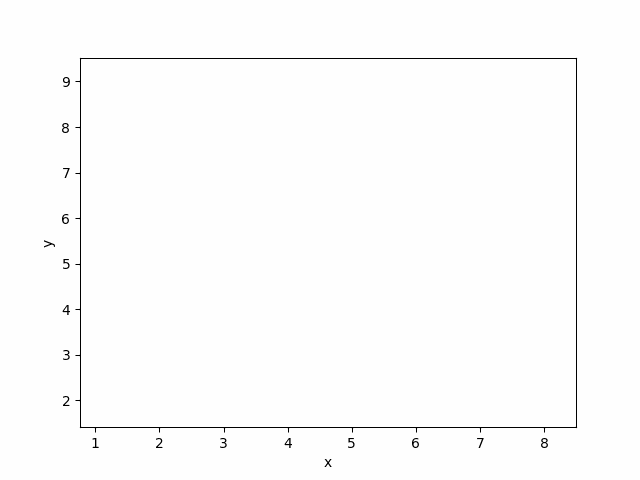

In [188]:
A = [[8.14516129032258, 1.7748917748917752], [1.1129032258064515, 3.311688311688312], [2.064516129032258, 4.06926406926407], [2.6290322580645165, 5.0649350649350655], [2.9354838709677415, 6.255411255411255], [2.9032258064516125, 7.142857142857143], [2.7258064516129035, 8.116883116883116], [2.3548387096774195, 9.155844155844155]]
A.reverse()
_, vis = triangulationGif(A)
vis.show_gif()


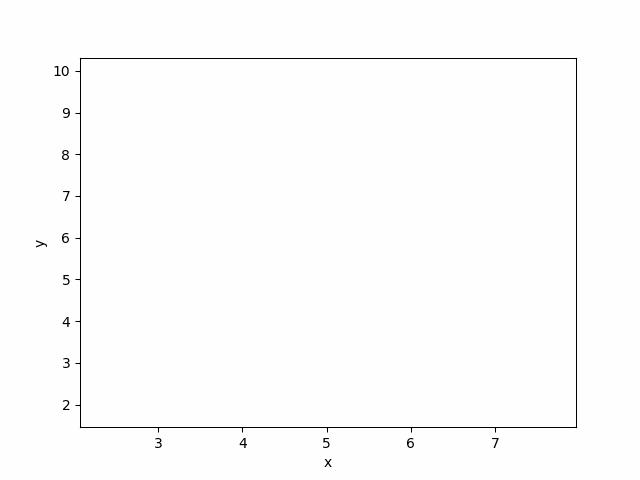

In [187]:
A = [[2.338709677419355, 1.861471861471862], [5.919354838709678, 3.4848484848484853], [3.8064516129032255, 4.696969696969697], [6.564516129032258, 5.25974025974026], [5.209677419354838, 6.125541125541126], [7.14516129032258, 7.0562770562770565], [6.451612903225806, 7.48917748917749], [7.693548387096774, 8.83116883116883], [4.790322580645162, 9.913419913419913]]



_, vis = triangulationGif(A)
vis.show_gif()
